In [1]:
import pandas as pd
import numpy as np

In [4]:
geodf = pd.read_csv("device_geo_data.csv")

In [5]:
geodf

,geo_id,mac,node
0,89195,b0:7f:b9:6f:53:30,WR003
1,24444,38:3f:b3:55:6a:e6,H071A
2,41734735,00:1d:cd:6d:d3:6c,3VAW1
3,120317,c8:63:fc:ae:da:8d,MC172
4,40238,7c:26:34:11:ae:14,MC096
...,...,...,...
152907,127812,c0:c6:87:6d:11:13,H115A
152908,66881,5c:e3:0e:e9:f6:2e,MC037
152909,41942415,50:39:55:89:78:3e,WR028
152910,12343005,18:b8:1f:9f:57:39,WR036


In [6]:
netdf = pd.read_csv("network_parent_child.csv")

In [7]:
netdf

,geo_id,parent_id,lon,lat,device_type
0,950351437,950351423.0,-83.759581,32.658571,tap
1,953550857,953550852.0,-83.586641,32.539248,tap
2,933436770,933436754.0,-83.713820,32.831317,tap
3,950348326,950348313.0,-83.754149,32.656190,tap
4,931035183,931035168.0,-83.690723,32.874315,tap
...,...,...,...,...,...
206061,931033358,931033305.0,-83.695732,32.879170,address
206062,948424286,948424277.0,-83.663388,32.791191,address
206063,932103961,932103047.0,-83.645818,32.636752,address
206064,932434238,932434221.0,-83.742775,32.916636,address


In [8]:
pd.merge(netdf, geodf, on = "geo_id")

,geo_id,parent_id,lon,lat,device_type,mac,node
0,41685527,950349321.0,-83.759950,32.664279,address,38:70:0c:15:38:72,WR063
1,30183,932228808.0,-83.658977,32.618693,address,14:c0:3e:00:5a:3d,3VAR1
2,42826649,950301483.0,-83.625975,32.850812,address,d4:3f:cb:d9:03:e1,MG25A
3,43058923,930688355.0,-83.678635,32.857833,address,f8:a0:97:b5:6b:62,H056A
4,40741166,942788691.0,-83.615650,32.620053,address,00:10:3f:07:71:41,WR022
...,...,...,...,...,...,...,...
16100,9709,930618484.0,-83.635937,32.842452,address,3c:04:61:45:0e:ad,H033A
16101,109259,931871554.0,-83.660871,32.541059,address,10:56:11:3e:1e:c4,WR072
16102,36316526,930310694.0,-83.715629,32.629735,address,f8:a0:97:31:7d:4c,3VAC1
16103,66208,952027894.0,-83.735776,32.884041,address,f4:5f:d4:a1:b7:c8,MC546


In [9]:
df0 = pd.merge(netdf, geodf, on = "geo_id")

In [40]:
u = df0["node"].unique()
u


array(['WR063', '3VAR1', 'MG25A', 'H056A', 'WR022', 'MC167', 'WR073',
       'WR068', 'H044A', 'H005A', 'H053A', '3WBN2', 'MC162', 'WR036',
       'MC087', 'H035A', '3VBJ1', 'MC051', 'H033A', 'H030A', 'WR149',
       '3VAF1', 'H098A', '3VAG1', 'MC048', 'MC073', 'MC027', 'MG004',
       'WR072', '3VBB1', 'MC047', 'WR052', '3VAC3', 'WR049', '3VAC1',
       'MC076', '3WBN3', '3VAZ1', 'MC172', 'MG022', 'WR027', 'MC042',
       'MG025', 'WR118', 'WR048', 'WR44B', 'MC096', 'MM118', 'WR016',
       'MG006', 'MC097', 'W046C', 'MG026', 'H095A', 'MC077', 'WR082',
       'MC074', '3VAE1', 'H043B', 'MG163', 'WR128', 'WR037', 'WR018',
       'WR120', 'MC075', 'MC050', 'MC101', 'MG011', 'MM121', 'MM106',
       'WR003', 'MC072', 'MC545', 'MC168', 'MM125', 'WR058', '3VBG1',
       'MC037', 'H081A', 'MG021', 'MC062', '3VBC2', '3VBD2', 'WR115',
       'MC055', 'WR143', 'WR031', 'MC138', 'W012B', 'MC054', 'WR011',
       'MC063', '3VAB1', 'MG018', 'WR135', 'W102B', 'WP001', 'WR070',
       'H094B', 'WR1

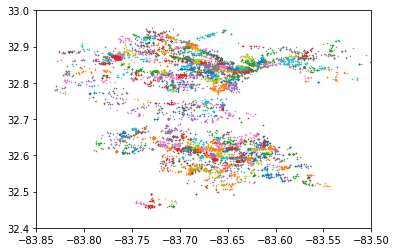

In [44]:
import matplotlib.pyplot as plt
plt.axis([-83.85, -83.5, 32.4, 33])
for i in u:
    df00 = df0[df0["node"]==i]
    plt.scatter(x=df00['lon'], y=df00['lat'], s=0.2)
plt.show()

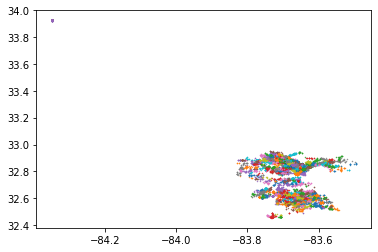

In [45]:
import matplotlib.pyplot as plt

for i in u:
    df00 = df0[df0["node"]==i]
    plt.scatter(x=df00['lon'], y=df00['lat'], s=0.2)
plt.show()

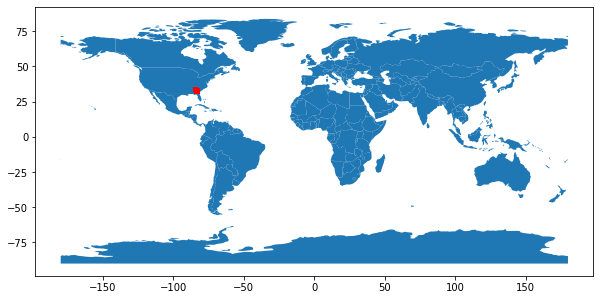

In [12]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = df0

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

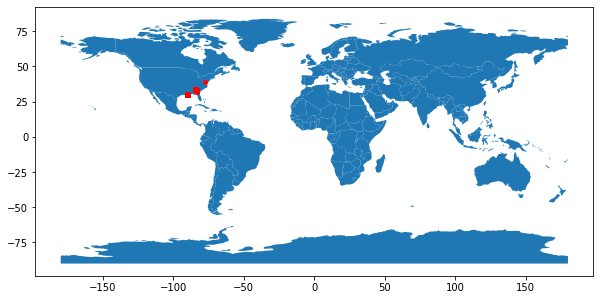

In [32]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = netdf

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [47]:
import csv
import pandas as pd
import numpy as np
df = pd.read_csv('fbc/3VAC1.csv')
for i in range(len(df)):
    df['amplitudes'][i]= df['amplitudes'][i][1:len(df['amplitudes'][i])-2]
    df['amplitudes'][i] = np.array(df['amplitudes'][i].split(','))
    df['amplitudes'][i] =[float(i)/100 for i in df['amplitudes'][i]]
data = df[['device_id', 'amplitudes']]
am = data['amplitudes']
am = am.apply(pd.Series)
f = [df['device_id'],am]
data = pd.concat(f,axis=1)

/Users/alexanderyoung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alexanderyoung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/alexanderyoung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
df3vac1 = pd.merge(data, geodf, left_on = "device_id", right_on = "mac")

In [52]:
df3vac1

,device_id,0,1,2,3,4,5,6,7,8,...,8697,8698,8699,8700,8701,8702,8703,geo_id,mac,node
0,3c:04:61:fe:1e:81,-62.62,-60.33,-61.28,-64.34,-64.24,-62.54,-62.92,-61.56,-60.85,...,-69.96,-72.66,-70.30,-72.50,-70.84,-69.88,-6.87,15058991,3c:04:61:fe:1e:81,3VAC1
1,3c:04:61:fe:1e:81,-63.33,-62.92,-62.15,-61.11,-61.98,-63.76,-65.12,-62.43,-62.79,...,-71.72,-71.37,-70.88,-71.85,-73.60,-71.55,-7.04,15058991,3c:04:61:fe:1e:81,3VAC1
2,3c:04:61:fe:1e:81,-68.79,-64.74,-62.56,-63.34,-63.61,-62.44,-62.43,-67.17,-66.55,...,-72.69,-71.00,-69.43,-71.61,-70.95,-72.94,-7.31,15058991,3c:04:61:fe:1e:81,3VAC1
3,58:19:f8:2a:ce:a7,-66.12,-66.27,-66.40,-69.14,-71.27,-66.70,-64.48,-65.89,-67.81,...,-70.81,-71.99,-73.89,-71.91,-71.09,-68.43,-6.77,14888804,58:19:f8:2a:ce:a7,3VAC1
4,58:19:f8:2a:ce:a7,-67.53,-66.07,-70.06,-70.08,-68.18,-65.93,-66.06,-67.63,-73.11,...,-70.40,-68.59,-71.02,-71.57,-69.08,-67.61,-6.88,14888804,58:19:f8:2a:ce:a7,3VAC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,a0:ff:70:0f:d5:39,-15.35,-14.66,-10.44,-8.76,-9.87,-10.23,-9.57,-8.64,-9.78,...,-62.81,-64.16,-64.05,-64.59,-63.61,-62.03,-6.15,36739950,a0:ff:70:0f:d5:39,3VAC1
1045,38:3f:b3:51:7e:36,38.42,31.88,9.75,3.43,2.73,45.83,2.24,31.06,0.58,...,-67.79,-28.00,-35.49,-75.64,-32.49,-98.32,-3.52,36240648,38:3f:b3:51:7e:36,3VAC1
1046,bc:9b:68:f3:30:95,-12.97,-14.15,-11.22,-10.14,-10.12,-11.76,-10.57,-8.69,-8.55,...,-60.61,-55.14,-52.68,-54.91,-54.35,-55.05,-5.48,41336049,bc:9b:68:f3:30:95,3VAC1
1047,bc:9b:68:f3:30:95,-15.64,-13.92,-12.48,-9.08,-10.27,-11.97,-9.83,-9.80,-10.79,...,-54.07,-53.45,-53.30,-54.10,-55.85,-57.32,-5.84,41336049,bc:9b:68:f3:30:95,3VAC1


In [54]:
pd.merge(df3vac1, netdf, on = "geo_id")

,device_id,0,1,2,3,4,5,6,7,8,...,8702,8703,geo_id,mac,node,parent_id,lon,lat,device_type,geometry
0,18:b8:1f:8b:b1:07,-62.70,-62.80,-63.20,-63.20,-63.20,-63.50,-63.50,-63.60,-64.60,...,-58.40,-5.84,127178,18:b8:1f:8b:b1:07,3VAC1,930313381.0,-83.709708,32.640765,address,POINT (-83.70971 32.64077)
1,18:b8:1f:8b:b1:07,-62.10,-62.20,-63.70,-64.20,-64.20,-65.20,-65.20,-65.50,-68.40,...,-61.00,-6.10,127178,18:b8:1f:8b:b1:07,3VAC1,930313381.0,-83.709708,32.640765,address,POINT (-83.70971 32.64077)
2,18:b8:1f:8b:b1:07,-64.40,-64.60,-62.90,-62.30,-62.30,-66.00,-66.30,-66.00,-64.10,...,-63.60,-6.36,127178,18:b8:1f:8b:b1:07,3VAC1,930313381.0,-83.709708,32.640765,address,POINT (-83.70971 32.64077)
3,64:12:69:f3:86:21,-52.29,-53.72,-54.90,-55.62,-56.83,-54.58,-53.75,-52.86,-52.88,...,-67.53,-6.78,127178,64:12:69:f3:86:21,3VAC1,930313381.0,-83.709708,32.640765,address,POINT (-83.70971 32.64077)
4,64:12:69:f3:86:21,-51.70,-52.45,-51.19,-49.85,-51.10,-52.09,-51.80,-52.55,-51.70,...,-67.14,-6.72,127178,64:12:69:f3:86:21,3VAC1,930313381.0,-83.709708,32.640765,address,POINT (-83.70971 32.64077)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,f8:a0:97:31:7d:4c,-41.10,-41.20,-40.20,-39.70,-39.70,-45.60,-46.10,-46.30,-48.50,...,-42.30,-4.23,36316526,f8:a0:97:31:7d:4c,3VAC1,930310694.0,-83.715629,32.629735,address,POINT (-83.71563 32.62973)
124,f8:a0:97:31:7d:4c,-44.80,-44.90,-41.90,-41.10,-41.10,-45.00,-45.30,-45.20,-44.40,...,-44.00,-4.40,36316526,f8:a0:97:31:7d:4c,3VAC1,930310694.0,-83.715629,32.629735,address,POINT (-83.71563 32.62973)
125,bc:9b:68:f3:30:95,-12.97,-14.15,-11.22,-10.14,-10.12,-11.76,-10.57,-8.69,-8.55,...,-55.05,-5.48,41336049,bc:9b:68:f3:30:95,3VAC1,930313631.0,-83.710503,32.644554,address,POINT (-83.71050 32.64455)
126,bc:9b:68:f3:30:95,-15.64,-13.92,-12.48,-9.08,-10.27,-11.97,-9.83,-9.80,-10.79,...,-57.32,-5.84,41336049,bc:9b:68:f3:30:95,3VAC1,930313631.0,-83.710503,32.644554,address,POINT (-83.71050 32.64455)
